# Classificação com Naive-Bayes

Dados desbalanceados

In [34]:
import pandas as pd
import numpy as np
import random
import seaborn as srn
srn.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
print(dataset.shape)
dataset.head()

(2000, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

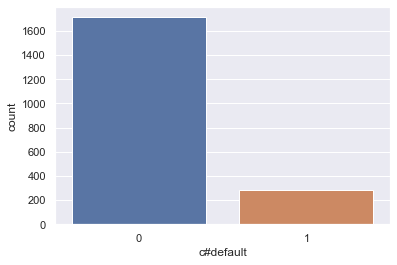

In [6]:
srn.countplot(x=dataset['c#default']);

In [7]:
X = dataset.iloc[:, 1:4]  # atributos
y = dataset.iloc[:, 4]    # classe
X.shape, y.shape

((1997, 3), (1997,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1597, 3), (400, 3), (1597,), (400,))

In [19]:
(np.unique(y, return_counts=True)) 

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [20]:
1714/len(dataset), 283/len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [21]:
1371/ len(y_train), 226/len(y_train)

(0.8584846587351284, 0.14151534126487164)

In [22]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [24]:
343/ len(y_test), 57/len(y_test)

(0.8575, 0.1425)

In [26]:
modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

In [27]:
previsoes = modelo.predict(X_test)
previsoes.shape

(400,)

In [31]:
accuracy_score(previsoes, y_test)

0.94

In [36]:
cm = confusion_matrix(previsoes, y_test)
cm

array([[339,  20],
       [  4,  37]], dtype=int64)

In [35]:
print(classification_report(previsoes, y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       359
           1       0.65      0.90      0.76        41

    accuracy                           0.94       400
   macro avg       0.82      0.92      0.86       400
weighted avg       0.95      0.94      0.94       400



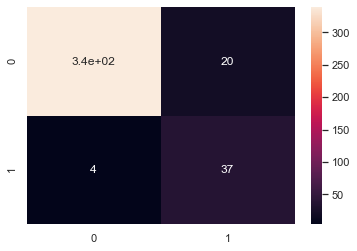

In [38]:
srn.heatmap(cm, annot=True);